In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

In [40]:
%run -i simulator.py

In [41]:
p = 3
q = 2
N = 20

simulator = GRDPG(p, q, N)

In [42]:
A = simulator.sample_Beta(1/2, 1)

In [43]:
import networkx as nx

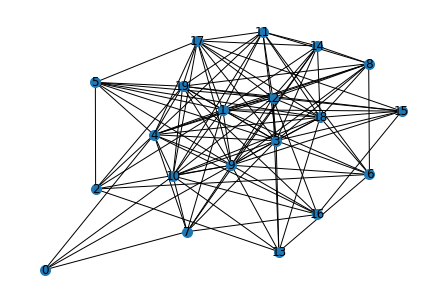

In [44]:
g = nx.from_numpy_matrix(A.numpy(), create_using=nx.DiGraph).to_undirected()
nx.draw(g, node_size=100, with_labels=True)

# Example of simulation from the Block model

In [19]:
%run -i simulator.py

In [36]:
Ncommunities = 5

B = tfp.distributions.Beta(1/10, 2).sample((Ncommunities,Ncommunities))
B = B + 0.3*tf.eye(Ncommunities)

simulator = BlockModel(B)
print(np.round(B.numpy(), 2))

[[0.3  0.   0.   0.02 0.76]
 [0.   0.31 0.15 0.   0.03]
 [0.   0.07 0.3  0.11 0.  ]
 [0.   0.   0.15 0.32 0.11]
 [0.   0.05 0.   0.   0.3 ]]


In [37]:
N = 20
initial_distribution = tfp.distributions.Dirichlet(np.abs(np.random.normal(5, 0.1, Ncommunities))).sample()

X = simulator.pop_sample(initial_distribution, N)
print(X.numpy())

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]]


In [38]:
A = simulator.sample(X)

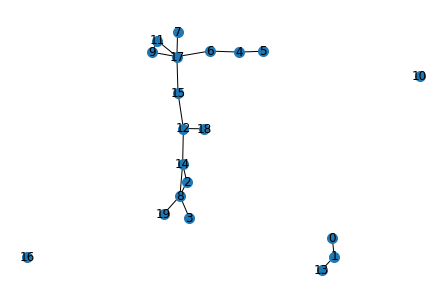

In [39]:
g = nx.from_numpy_matrix(A.numpy(), create_using=nx.DiGraph).to_undirected()
nx.draw(g, node_size=100, with_labels=True)